In [1]:
] activate ../.

Activating environment at `~/Dropbox/Code/PowerSystemsScientificComputing/OpModelExperiment/Project.toml`


In [2]:
using PowerSystems
using TimeSeries
using Dates
using Random
using CSV
using Plots

In [3]:
uc_system = System(100.0);

In [4]:
nodes5    = [Bus(1,"nodeA", "PV", 0, 1.0, (min = 0.9, max=1.05), 230),
             Bus(2,"nodeB", "PQ", 0, 1.0, (min = 0.9, max=1.05), 230),
             Bus(3,"nodeC", "PV", 0, 1.0, (min = 0.9, max=1.05), 230),
             Bus(4,"nodeD", "REF", 0, 1.0, (min = 0.9, max=1.05), 230),
             Bus(5,"nodeE", "PV", 0, 1.0, (min = 0.9, max=1.05), 230),
            ];

for b in nodes5
    add_component!(uc_system, b)
end

In [5]:
branches5 = [Line("1", true, 0.0, 0.0, Arc(from=nodes5[1],to=nodes5[2]), 0.00281, 0.0281, (from=0.00356, to=0.00356), 2.0, (min = -0.7, max = 0.7)),
             Line("2", true, 0.0, 0.0, Arc(from=nodes5[1],to=nodes5[4]), 0.00304, 0.0304, (from=0.00329, to=0.00329), 2.0, (min = -0.7, max = 0.7)),
             Line("3", true, 0.0, 0.0, Arc(from=nodes5[1],to=nodes5[5]), 0.00064, 0.0064, (from=0.01563, to=0.01563), 18.8120, (min = -0.7, max = 0.7)),
             Line("4", true, 0.0, 0.0, Arc(from=nodes5[2],to=nodes5[3]), 0.00108, 0.0108, (from=0.00926, to=0.00926), 11.1480, (min = -0.7, max = 0.7)),
             Line("5", true, 0.0, 0.0, Arc(from=nodes5[3],to=nodes5[4]), 0.00297, 0.0297, (from=0.00337, to=0.00337), 40.530, (min = -0.7, max = 0.7)),
             Line("6", true, 0.0, 0.0, Arc(from=nodes5[4],to=nodes5[5]), 0.00297, 0.0297, (from=0.00337, to=00.00337), 2.00, (min = -0.7, max = 0.7))
]
for b in branches5
    add_component!(uc_system, b)
end

In [6]:
thermal_generators5_uc_testing = [ThermalStandard("Alta", true, nodes5[1], 0.52, 0.0,
           TechThermal(0.5, PowerSystems.CT, PowerSystems.NATURAL_GAS, (min=0.52, max=1.40),  (min = -0.30, max = 0.30), (up=0.5, down=0.5), (up=1.0, down=1.0)),
           ThreePartCost([ (7122.4347750000002, 0.52),
                                 (7317.43201358, 0.73),                    
                                 (7642.4891244200003, 0.94),
                                 (8775.88432216, 1.4)], 0.0, 5665.23, 0.)
           ),
           ThermalStandard("Park City", true, nodes5[1], 0.52, 0.0,
               TechThermal(2.2125, PowerSystems.CT, PowerSystems.NATURAL_GAS, (min=0.52, max=1.70), (min =-1.275, max=1.275), (up=0.5, down=0.5), (up=1.0, down=1.0)),
               ThreePartCost([(7141.9330705200002, 0.52)
                             (7348.7746684400001, 0.83)               
                             (7670.1972285800002, 1.04)
                             (9260.4196955, 1.7)], 0.0, 5665.23, 0.0)
           ),
           ThermalStandard("Solitude", true, nodes5[3], 0.0, 0.00,
               TechThermal(5.20, PowerSystems.CC, PowerSystems.NATURAL_GAS, (min=2.7, max=5.20), (min =-3.90, max=3.90), (up=0.015, down=0.015), (up=5.0, down=3.0)),
               ThreePartCost([(4877.567034952806, 2.7),
                             (5507.368250673228, 3.32),       
                             (8374.484237754725, 4.93),       
                             (9331.01276343956, 5.20)], 0.0, 28046.0, 0.0)
           ),
           ThermalStandard("Sundance", true, nodes5[4], 0.9237, 0.00,
               TechThermal(2.5, PowerSystems.ST, PowerSystems.COAL, (min=0.92, max=2.0), (min =-1.5, max=1.5), (up=0.025, down=0.025), (up=2.0, down=1.0)),
               ThreePartCost([(5437.4159564599997, 0.92),
                             (6039.7361012499996, 1.43),
                             (6751.7596430999997, 1.74),
                             (7775.854616729999, 2.0) ], 0.0, 11172.0, 0.0)
           ),
           ThermalStandard("Brighton", true, nodes5[5], 0.0, 0.0,
               TechThermal(7.5, PowerSystems.CC, PowerSystems.NATURAL_GAS, (min=3.7, max=6.0), (min =-4.50, max=4.50), (up=0.015, down=0.015), (up=5.0, down=3.0)),
               ThreePartCost([(4551.118299650451, 3.7),
                                 (5577.404111319302, 4.32),       
                                 (7600.733096364351, 5.24),       
                                 (9828.37578065609, 6.00)  ], 0.0, 28046.0, 0.0)
           )];


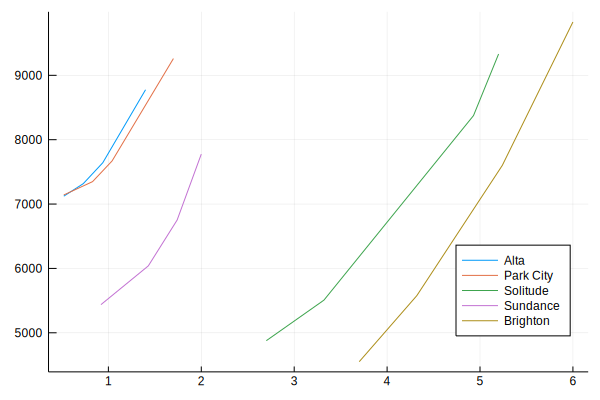

In [7]:
p = plot(legend = :bottomright)
for t in thermal_generators5_uc_testing
    plot!([x[2] for x in t.op_cost.variable.cost], [x[1] for x in t.op_cost.variable.cost], label = t.name)
end
display(p)

In [8]:
loads5 = [ PowerLoad("Bus2", true, nodes5[2], PowerSystems.ConstantPower, 2.1, 0.9861, 4.6, 0.9861),
           PowerLoad("Bus3", true, nodes5[3], PowerSystems.ConstantPower, 2.1, 0.9861, 4.6, 0.9861),
           PowerLoad("Bus4", true, nodes5[4], PowerSystems.ConstantPower, 2.1, 1.3147, 2.1, 1.3147),
        ];

for b in loads5
    add_component!(uc_system, b)
end

In [9]:
il = InterruptibleLoad("IloadBus4", true, nodes5[4], PowerSystems.ConstantPower, 2.10, 1.8,  3.10, 2.0, 
                        TwoPartCost((0.0, 2400.0), 38046.0))

add_component!(uc_system, il)

In [10]:
renewable_generators5 = [RenewableDispatch("WindBusA", true, nodes5[5], 0.0, 0.0, PowerSystems.WT, 1.200, TwoPartCost(22.0, 0.0)),
                         RenewableDispatch("WindBusB", true, nodes5[4], 0.0, 0.0, PowerSystems.WT, 1.200, TwoPartCost(22.0, 0.0)),
                         RenewableDispatch("WindBusC", true, nodes5[3], 0.0, 0.0, TechRenewable(1.20, PowerSystems.WT, (min = -0.800, max = 0.800), 1.0), TwoPartCost(22.0, 0.0))];

for b in renewable_generators5
    add_component!(uc_system, b)
end

In [11]:
reserve5 = StaticReserve("Spinning", thermal_generators5_uc_testing, 1.0, 1.0)
add_component!(uc_system, reserve5)

In [12]:
uc_system

,ConcreteType,SuperTypes,Count
,String,String,Int64
1,Bus,Topology <: Component <: PowerSystemType <: InfrastructureSystemsType <: Any,5
2,InterruptibleLoad,ControllableLoad <: ElectricLoad <: Injection <: Device <: Component <: PowerSystemType <: InfrastructureSystemsType <: Any,1
3,Line,ACBranch <: Branch <: Device <: Component <: PowerSystemType <: InfrastructureSystemsType <: Any,6
4,PowerLoad,StaticLoad <: ElectricLoad <: Injection <: Device <: Component <: PowerSystemType <: InfrastructureSystemsType <: Any,3
5,RenewableDispatch,RenewableGen <: Generator <: Injection <: Device <: Component <: PowerSystemType <: InfrastructureSystemsType <: Any,3
6,StaticReserve,Reserve <: Service <: Component <: PowerSystemType <: InfrastructureSystemsType <: Any,1


In [13]:
reserves1 = CSV.read("../data/raw_input_data/RTS_Data/timeseries_data_files/Reserves/DAY_AHEAD_regional_Spin_Up_R1.csv");

In [14]:
"../data/"

"../data/"

In [44]:
reserves2 = CSV.read("../data/raw_input_data/RTS_Data/timeseries_data_files/Reserves/DAY_AHEAD_regional_Spin_Up_R2.csv")
reserves3 = CSV.read("../data/raw_input_data/RTS_Data/timeseries_data_files/Reserves/DAY_AHEAD_regional_Spin_Up_R3.csv")
total_reserves = 0.01*(reserves1[!,:Spin_Up_R1] + reserves2[!,:Spin_Up_R2] + reserves3[!,:Spin_Up_R3]);
Time_stamps = DateTime.(reserves1[!,:Year],reserves1[!,:Month], reserves1[!,:Day], (reserves1[!,:Period] .- 1));
reserves_time_array = TimeSeries.TimeArray(Time_stamps, total_reserves, [:Spinning]);

In [45]:
add_forecast!(uc_system, reserves_time_array, reserve5, "Spinning", 1.0)

60 minutes

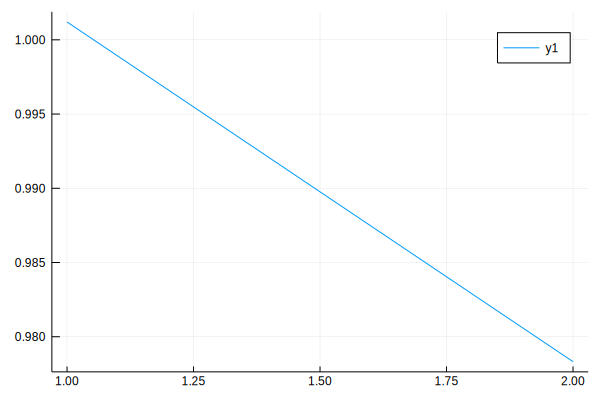

In [76]:
plot(total_reserves[1:2])

In [47]:
wind = CSV.read("../data/raw_input_data/RTS_Data/timeseries_data_files/WIND/DAY_AHEAD_wind.csv")
wind[!,Symbol("309_WIND_1")] = wind[!,Symbol("309_WIND_1")]./maximum(wind[!,Symbol("309_WIND_1")])
wind[!,Symbol("317_WIND_1")] = wind[!,Symbol("317_WIND_1")]./maximum(wind[!,Symbol("317_WIND_1")])
wind[!,Symbol("303_WIND_1")] = wind[!,Symbol("303_WIND_1")]./maximum(wind[!,Symbol("303_WIND_1")])
wind[!,Symbol("122_WIND_1")] = wind[!,Symbol("122_WIND_1")]./maximum(wind[!,Symbol("122_WIND_1")])
Time_stamps = DateTime.(wind[!,:Year],wind[!,:Month], wind[!,:Day], wind[!,:Period] .- 1);

In [48]:
wind_forecast1 = Deterministic(renewable_generators5[1],"Deterministic",TimeSeries.TimeArray(Time_stamps, wind[!,Symbol("309_WIND_1")]));
wind_forecast2 = Deterministic(renewable_generators5[2],"Deterministic",TimeSeries.TimeArray(Time_stamps, wind[!,Symbol("317_WIND_1")]));
wind_forecast3 = Deterministic(renewable_generators5[3],"Deterministic",TimeSeries.TimeArray(Time_stamps, wind[!,Symbol("122_WIND_1")]));
wind_forecasts = [wind_forecast1, wind_forecast2, wind_forecast3]
add_forecasts!(uc_system, wind_forecasts)

60 minutes

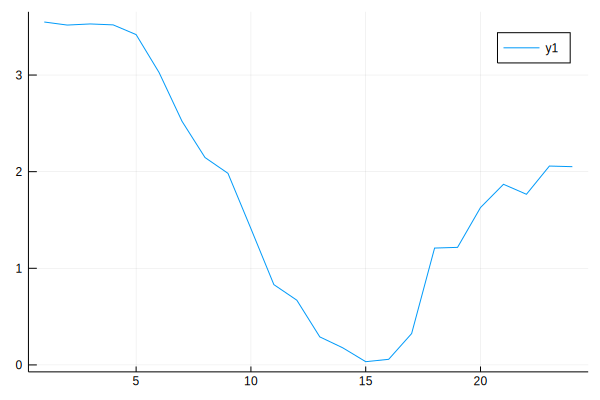

In [72]:
total_wind_power = 1.2*(wind[!,Symbol("309_WIND_1")] + wind[!,Symbol("317_WIND_1")] + wind[!,Symbol("122_WIND_1")])
plot(total_wind_power[1:24])

In [57]:
load = CSV.read("../data/raw_input_data/RTS_Data/timeseries_data_files/Load/DAY_AHEAD_regional_Load.csv");
load[!,Symbol("1")] = load[!,Symbol("1")]./maximum(load[!,Symbol("1")])
load[!,Symbol("2")] = load[!,Symbol("2")]./maximum(load[!,Symbol("2")])
load[!,Symbol("3")] = load[!,Symbol("3")]./maximum(load[!,Symbol("3")])
Time_stamps = DateTime.(load[!,:Year],load[!,:Month], load[!,:Day], load[!,:Period].- 1);

In [58]:
load_forecast1 = Deterministic(loads5[1],"Deterministic",TimeSeries.TimeArray(Time_stamps, load[!,Symbol("1")]));
load_forecast2 = Deterministic(loads5[2],"Deterministic",TimeSeries.TimeArray(Time_stamps, load[!,Symbol("2")]));
load_forecast3 = Deterministic(loads5[3],"Deterministic",TimeSeries.TimeArray(Time_stamps, load[!,Symbol("3")]));
load_forecast_interruptible = Deterministic(il, "Deterministic",TimeSeries.TimeArray(Time_stamps, load[!,Symbol("3")]));
load_forecasts = [load_forecast1, load_forecast2, load_forecast3, load_forecast_interruptible]
add_forecasts!(uc_system, load_forecasts)

60 minutes

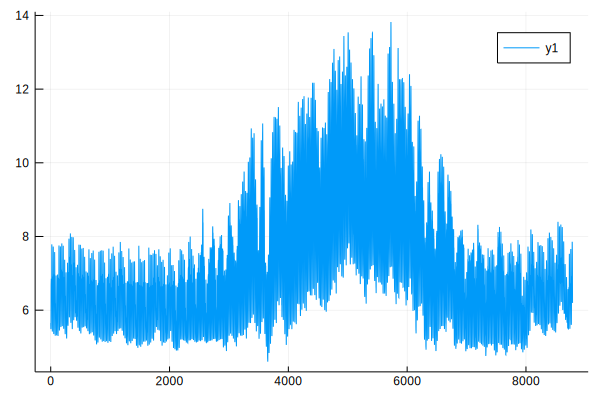

In [59]:
total_load = 4.6*(load[!,Symbol("1")] + load[!,Symbol("2")]) + 5.20*(load[!,Symbol("3")])
plot(total_load)

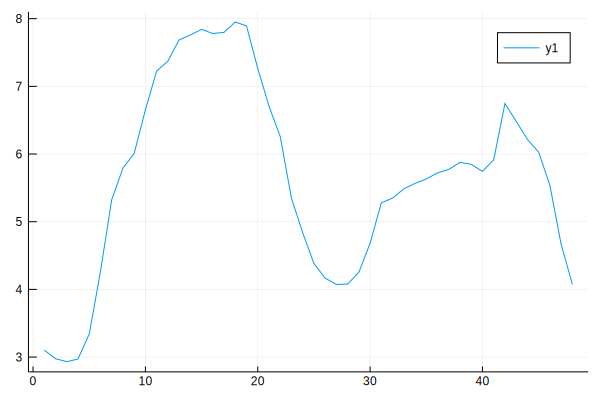

In [73]:
plot((total_load - total_wind_power+total_reserves)[1:48])

In [61]:
get_forecasts_initial_time(uc_system)

2020-01-01T00:00:00

In [62]:
split_forecasts!(uc_system,
                get_forecasts(Deterministic, uc_system, Dates.DateTime("2020-01-01T00:00:00")),
                Dates.Hour(24),
                48)

┌ Info: Created forecast with
│   initial_time = 2020-01-01T00:00:00
│   horizon = 48
│   component = PowerLoad("Bus2", true, Bus(2, "nodeB", PowerSystems.PQ, 0.0, 1.0, (min = 0.9, max = 1.05), 230.0, InfrastructureSystems.InfrastructureSystemsInternal(UUID("83087e58-2924-4089-9f65-1063a3271cc6"))), PowerSystems.ConstantPower, 2.1, 0.9861, 4.6, 0.9861, InfrastructureSystems.InfrastructureSystemsInternal(UUID("bcfb85fa-a834-489d-93ae-36c5a0b48005")))
└ @ InfrastructureSystems /Users/jdlara/.julia/packages/InfrastructureSystems/vJOMW/src/deterministic_forecast.jl:50
┌ Info: Created forecast with
│   initial_time = 2020-01-02T00:00:00
│   horizon = 48
│   component = PowerLoad("Bus2", true, Bus(2, "nodeB", PowerSystems.PQ, 0.0, 1.0, (min = 0.9, max = 1.05), 230.0, InfrastructureSystems.InfrastructureSystemsInternal(UUID("83087e58-2924-4089-9f65-1063a3271cc6"))), PowerSystems.ConstantPower, 2.1, 0.9861, 4.6, 0.9861, InfrastructureSystems.InfrastructureSystemsInternal(UUID("bcfb85fa-a834-48

In [63]:
Minute(Hour(1))/Minute(1)

60.0

In [64]:
to_json(uc_system, "data/uc_system.json")

SystemError: SystemError: opening file "data/uc_system.json": No such file or directory

## UC Model for 5 Bus

In [29]:
# Getting data for the model.
# Time
time_periods = get_forecasts_horizon(uc_system)
time_periods_set = 1:time_periods
data_first_step = get_forecasts_initial_time(uc_system)

0001-01-01T00:00:00

In [30]:
# Thermal Generation
thermal_generators = get_components(ThermalStandard, uc_system)
thermal_gen_set = [get_name(g) for g in thermal_generators]
gen_pwl_points = Dict(get_name(g) => 1:length(g.op_cost.variable) for g in thermal_generators)
# Renewable Generation
renewable_generators = get_components(RenewableDispatch, uc_system)
renewable_forecasts = get_component_forecasts(RenewableDispatch, uc_system, data_first_step)
# The model below makes variables for Hydro and Renewables together.
renewable_gen_set = [get_name(g) for g in renewable_generators];

In [31]:
fixed_load_forecast =  get_component_forecasts(PowerLoad, uc_system, data_first_step);
interruptible_load_forecast =  get_component_forecasts(InterruptibleLoad, uc_system, data_first_step);
interruptible_load_set = [get_forecast_component_name(collect(interruptible_load_forecast)[1])]

BoundsError: BoundsError: attempt to access 0-element Array{Any,1} at index [1]

In [32]:
total_load_forecast = zeros(time_periods)
for load in fixed_load_forecast
    for i in 1:time_periods
        total_load_forecast[i] += get_component(load).maxactivepower*get_forecast_value(load, i)
    end
end

iload_forecast = zeros(time_periods)
for load in interruptible_load_forecast
    for i in 1:time_periods
        iload_forecast[i] += get_component(load).maxactivepower*get_forecast_value(load, i)
    end
end

In [33]:
reserve_requirement = zeros(time_periods)
for reserve in get_component_forecasts(StaticReserve, uc_system, data_first_step)
    for i in 1:time_periods
        reserve_requirement[i] =  get_component(reserve).requirement*get_forecast_value(reserve, i)
    end
end

In [34]:
using JuMP
m = JuMP.Model(with_optimizer(Gurobi.Optimizer))

@variable(m, cg[thermal_gen_set,time_periods_set])
@variable(m, pg[thermal_gen_set,time_periods_set] >= 0)
@variable(m, pw[renewable_gen_set,time_periods_set] >= 0)
@variable(m, pl[interruptible_load_set,time_periods_set] >= 0)
@variable(m, rg[thermal_gen_set,time_periods_set] >= 0)
@variable(m, ug[thermal_gen_set,time_periods_set], binary=true)
@variable(m, vg[thermal_gen_set,time_periods_set], binary=true)
@variable(m, wg[thermal_gen_set,time_periods_set], binary=true)
@variable(m, 0 <= lambda_lg[g in thermal_gen_set, gen_pwl_points[g], time_periods_set] <= 1);

UndefVarError: UndefVarError: Gurobi not defined

In [35]:
@objective(m, Min,
    sum(
        sum(cg[get_name(g),t] + 
        (get_op_cost(g) |> get_fixed )*ug[get_name(g),t] + 
        (get_op_cost(g) |> get_startup )*vg[get_name(g),t] for g in thermal_generators) - 
        sum(get_component(il).op_cost.variable.cost[2]*pl[get_forecast_component_name(il), t] for il in interruptible_load_forecast) -
        sum(pw[get_forecast_component_name(ren), t] for ren in renewable_forecasts)  
        for t in time_periods_set)
) # (1);

UndefVarError: UndefVarError: m not defined

In [36]:
# All constraints for first time period
for g in thermal_generators
    name = get_name(g)
    power_output_t0 = get_activepower(g)
    unit_on_t0 = 1.0*(power_output_t0 > 0)
    activepowerlimits = get_tech(g) |> get_activepowerlimits
    time_minimum = get_tech(g) |> get_timelimits
    ramplimits = get_tech(g) |> get_ramplimits

    if unit_on_t0 > 0
        @constraint(m, sum( (ug[name,t]-1) for t in 1:min(time_periods, time_minimum.up - 999.0) ) == 0) # (4)
    else
        @constraint(m, sum( ug[name,t] for t in 1:min(time_periods, time_minimum.down - 999.0) ) == 0) # (5)
    end

    @constraint(m, ug[name,1] - unit_on_t0 == vg[name,1] - wg[name,1]) # (6)
    @constraint(m, unit_on_t0*(power_output_t0 - activepowerlimits.min) <= unit_on_t0*(activepowerlimits.max - activepowerlimits.min) - max(0, activepowerlimits.max - ramplimits.down)*wg[name,1]) # (10)     
        
        

end

In [37]:
for t in time_periods_set

    @constraint(m,
        sum( pg[get_name(g),t] + g.tech.activepowerlimits.min*ug[get_name(g),t] for g in thermal_generators) +
        sum( pw[get_name(g),t] for g in renewable_generators) 
        == total_load_forecast[t] + sum(pl[get_forecast_component_name(l),t] for l in interruptible_load_forecast)
    ) # (2)
    
    for il in interruptible_load_forecast
        load_value = get_component(il).maxactivepower*get_forecast_value(il, t)
        set_upper_bound(pl[get_forecast_component_name(il), t], load_value)
    end
    
    for reserve in get_component_forecasts(StaticReserve, uc_system, data_first_step)
        @constraint(m, sum(rg[name,t] for name in thermal_gen_set) >= get_component(reserve).requirement*get_forecast_value(reserve, t)) # (3)
    end
    
     for g in thermal_generators
        name = get_name(g)
        power_output_t0 = get_activepower(g)
        unit_on_t0 = 1.0*(power_output_t0 > 0)
        activepowerlimits = get_tech(g) |> get_activepowerlimits
        time_minimum = get_tech(g) |> get_timelimits
        ramplimits = get_tech(g) |> get_ramplimits
        piecewise_production = get_op_cost(g) |> get_variable

       if t >= time_minimum.up || t == time_periods
            @constraint(m, sum( vg[name,t2] for t2 in (t-min(time_minimum.up,time_periods)+1):t) <= ug[name,t])  # (13)
        end

        if t >= time_minimum.down || t == time_periods
            @constraint(m, sum( wg[name,t2] for t2 in (t-min(time_minimum.down,time_periods)+1):t) <= 1 - ug[name,t])  # (14)
        end

        @constraint(m, pg[name,t] + rg[name,t] <= (activepowerlimits.max - activepowerlimits.min)*ug[name,t] - max(0, (activepowerlimits.max - ramplimits.up))*vg[name,t]) # (17)


        @constraint(m, pg[name,t] == sum((piecewise_production[l][1] - piecewise_production[1][1])*lambda_lg[name,l,t] for l in gen_pwl_points[name])) # (21)
        @constraint(m, cg[name,t] == sum((piecewise_production[l][2] - piecewise_production[1][2])*lambda_lg[name,l,t] for l in gen_pwl_points[name])) # (22)
        @constraint(m, ug[name,t] == sum(lambda_lg[name,l,t] for l in gen_pwl_points[name])) # (23)
    end

    for rgen in renewable_forecasts
        name = get_forecast_component_name(rgen)
        ub = rgen.component.tech.rating*get_forecast_value(rgen,t)
        set_upper_bound(pw[name,t], ub)
    end
    
end

In [38]:
using Gurobi
optimize!(m)

UndefVarError: UndefVarError: m not defined

In [39]:
value.(ug)

UndefVarError: UndefVarError: ug not defined

In [40]:
plot((upper_bound.(pw).data)')

UndefVarError: UndefVarError: pw not defined

In [41]:
plot((upper_bound.(pw).data)')

UndefVarError: UndefVarError: pw not defined

In [42]:
plot(value.(rg).data')

UndefVarError: UndefVarError: rg not defined

In [43]:
plot(value.(ug).data')

UndefVarError: UndefVarError: ug not defined